<a href="https://colab.research.google.com/github/talalqaiser/CIFAR100/blob/main/ML_Assignment_3_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import pandas as pd


import matplotlib.pyplot as plt # plotting library
%matplotlib inline

import keras
from keras.datasets.cifar100 import load_data
from keras.layers import Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
import tensorflow as tf
import os

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, MaxPooling2D
from sklearn.metrics import confusion_matrix
import cv2
from keras.applications.inception_v3 import InceptionV3, preprocess_input


In [2]:
(xtrain, ytrain), (xtest, ytest) = load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [3]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


(50000, 32, 32, 3)
original dim: (50000, 32, 32, 3)


new dim: (50000, 75, 75, 3)


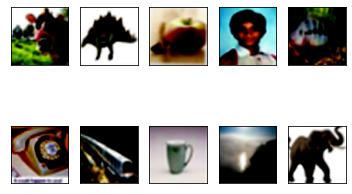

In [4]:
print(xtrain.shape)

def img_resize(x):
  res_x = []
  for img in x:
    res_img = cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC)
    res_x.append(res_img)
  res_x = np.array(res_x)
  res_x = preprocess_input(res_x)
  return res_x

print('original dim:', xtrain.shape)

xtrain = img_resize(xtrain)
xtest = img_resize(xtest)

print('new dim:', xtrain.shape)


# create a grid of 2x5 images for 10 classes
for i in range(0, 10):
  ax = plt.subplot(2,5,1 + i)
  plt.imshow(xtrain[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

# xtrain = preprocess_input(xtrain)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [5]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = (75, 75, 3), padding = 'same'))
model.add(MaxPooling2D(pool_size =3, strides = 2, padding = 'valid'))
model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(MaxPooling2D(pool_size = 3, strides = 2, padding = 'valid'))
model.add(Conv2D(filters = 120, kernel_size = 3, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(Conv2D(filters = 120, kernel_size = 3, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(Conv2D(filters = 60, kernel_size = 2, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(MaxPooling2D(pool_size = 1, strides = 2))
model.add(Flatten())
model.add(Dense(units = 100, activation = 'tanh', ))
model.add(Dense(units = 100, activation = 'softmax'))
# model.layers[0].trainable = False

In [6]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
# model.summary()

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=32, epochs=5, validation_data=(xtest, ytest), verbose=2, shuffle=True)

Epoch 1/5
1563/1563 - 1373s - loss: 4.1089 - accuracy: 0.0880 - val_loss: 3.8353 - val_accuracy: 0.1345 - 1373s/epoch - 879ms/step
Epoch 2/5
1563/1563 - 1320s - loss: 3.6491 - accuracy: 0.1635 - val_loss: 3.5251 - val_accuracy: 0.1827 - 1320s/epoch - 845ms/step
Epoch 3/5
1563/1563 - 1313s - loss: 3.3946 - accuracy: 0.2056 - val_loss: 3.3193 - val_accuracy: 0.2253 - 1313s/epoch - 840ms/step
Epoch 4/5
1563/1563 - 1309s - loss: 3.2065 - accuracy: 0.2388 - val_loss: 3.1805 - val_accuracy: 0.2492 - 1309s/epoch - 837ms/step
Epoch 5/5
1563/1563 - 1296s - loss: 3.0464 - accuracy: 0.2698 - val_loss: 3.0536 - val_accuracy: 0.2724 - 1296s/epoch - 829ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
3.481098699569702
Training and validation loss    :  3.481098699569702 3.3827675342559815
Training and validation accuracy:  0.19313200265169145 0.2128199964761734
313/313 [==============================] - 63s 202ms/step - loss: 3.0536 - accuracy: 0.2724
accuracy : [3.05358624458313, 0.27239999175071716]


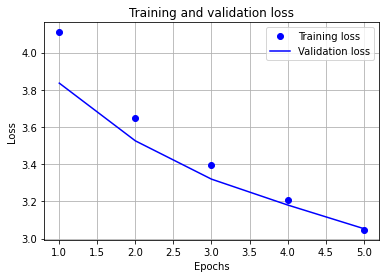

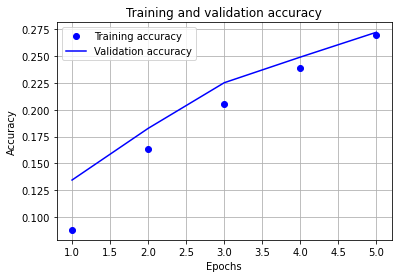

In [8]:
print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()